In [1]:
from dotenv import load_dotenv
load_dotenv()

True

In [2]:
# node에서 받지 않은것들: retriever, rag_chain, llm(general_answer_node)

from RAG.retriever import QdrantRetrieverFactory
from RAG.rag import chat_history_rag
from nodes import *
from states import GraphState

qs = QdrantRetrieverFactory()

retriever = qs.retriever(collection_name="RAG_Template", fetch_k=3)
compression_retriever = qs.compression_retriever(collection_name="RAG_Template", fetch_k=20, top_n=3)

rerank_chain = chat_history_rag(compression_retriever)
chain = chat_history_rag(retriever)

In [3]:
response = chain.invoke({"question": "RAG Insight", "chat_history": "[]"},)
print(response)

RAG Insight highlights that the performance and effectiveness of RAG and Agentic RAG systems depend on factors such as LLM model selection, text segmentation techniques, embedding strategies, and clear workflow state management with branching conditions. Future research directions emphasize enhancing automatic error detection and recovery, optimizing domain-specific workflows, quantitatively evaluating various LLM and embedding models, and dynamically improving workflows based on real-time user feedback. These improvements are expected to increase the stability, efficiency, and practical applicability of RAG systems. Additionally, with rapid advances in MCP and AI Agent technologies, RAG is anticipated to play a more strategic and core role in LLM-based AI systems beyond traditional fine-tuning approaches.

**Source**  
- docling_outputs\insight_Agentic.pdf.md


In [4]:
# response = rerank_chain.invoke({"question": "RAG Insight"})
# print(response)

In [5]:
from langgraph.graph import StateGraph, START, END
from langgraph.checkpoint.memory import MemorySaver

workflow = StateGraph(GraphState)

workflow.add_node("retrieve", RetrieveNode(retriever))
workflow.add_node("llm_answer", LLMAnswerNode(chain))

workflow.add_edge(START, "retrieve")
workflow.add_edge("retrieve", "llm_answer")
workflow.add_edge("llm_answer", END)

memory = MemorySaver()

app = workflow.compile(checkpointer=memory)

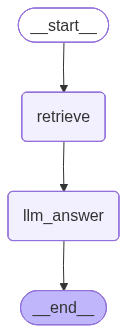

In [6]:
app

In [7]:
from langchain_core.runnables import RunnableConfig
from langchain_teddynote.messages import invoke_graph, stream_graph, random_uuid


def ask(question):
    # config 설정(재귀 최대 횟수, thread_id)
    config = RunnableConfig(
        recursion_limit=20, configurable={"thread_id": random_uuid()}
    )

    # 질문 입력
    inputs = {
        "question": question,
    }

    # 스트리밍 형식으로 그래프 실행
    stream_graph(
        app,
        inputs,
        config,
        
    )

In [8]:
ask("대한민국의 수도는?")


🔄 Node: llm_answer 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
대한민국의 수도는 서울입니다.

In [9]:
ask("RAG Insight")


🔄 Node: llm_answer 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
RAG Insight highlights the strategic and core role of Retrieval-Augmented Generation (RAG) in future LLM-based AI systems, emphasizing that traditional fine-tuning approaches have limitations. Key factors determining RAG and Agentic RAG system performance include LLM model selection, text segmentation methods, embedding strategies, and clear workflow state management with branching conditions. Future research directions focus on enhancing automatic error detection and recovery, optimizing domain-specific workflows, quantitatively evaluating various LLM and embedding models, and dynamically improving workflows based on real-time user feedback. These advancements are expected to improve the stability, efficiency, and practical applicability of RAG and Agentic RAG systems.

**Source**  
- docling_outputs\insight_Agentic.pdf.md (pages 1-3)

In [10]:
ask("내이전 질문이 뭐였지?")



🔄 Node: llm_answer 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
이전 질문이 없습니다.

In [11]:
from langchain_core.runnables import RunnableConfig
from langchain_teddynote.messages import invoke_graph, stream_graph, random_uuid


def invoke_ask(question):
    # config 설정(재귀 최대 횟수, thread_id)
    config = RunnableConfig(
        recursion_limit=20, configurable={"thread_id": random_uuid()}
    )

    # 질문 입력
    inputs = {
        "question": question,
    }

    # 스트리밍 형식으로 그래프 실행
    invoke_graph(
        app,
        inputs,
        config,
    )

In [12]:
invoke_ask("Self-RAG 에서 사용되는 관련성 평가 노드 예제를 찾아줘")


🔄 Node: retrieve 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
page_content='둘째, Tool 호출 및 통합은 description 기반 프롬 프트와 일관된 인터페이스를 활용하여, 다양한 도구 를 자연스럽게 조합할 수 있고, 새로운 도구의 추가· 교체, 도메인 확장도 높은 유연성으로 지원한다.

셋째, LangGraph의 상태 기반 제어는 각 노드 실 행 결과에 따른 동적 흐름 전환과 예외 상황 대응, 시스템 신뢰성 향상에 크게 기여한다. 평가 노드를 독립적으로 추가하여, BLEU, ROUGE, factual consistency 등 자동화된 품질 메트릭과 human in the loop 평가도 효과적으로 연계할 수 있다[10]. 이 러한 평가지표와 평가 방식은, 본 논문의 실험뿐만 아니라 최근 RAG 및 NLP 분야에서 성능 비교와 품 질 검증의 객관적·표준적 기준으로 널리 채택되고 있다.

## Ⅵ. 실험 및 평가' metadata={'source': 'docling_outputs\\LangGraph-Based Integrated Architecture for CrewAI Multi-Agent.pdf.md', '_id': 'ae835789-ba60-47d0-909a-363e08aa7c3d', '_collection_name': 'RAG_Template'}
page_content='여기서, create react agent를 LangGraph의 노드 로 만들어서 실행하였을때, tool에서 틀렸던 코드를 수정하여 실행시켜 줬던점이다. 일반 llm을 명시하는 코드에서 moㅇel로 오타를 냈는데, 알아서 model로 바꿔서 코드를 실행시켜주는 경험이 있었다. agent 로 만들어 주는 순간, LLM이 작성한 코드에도 관여 를 한다는 것이 발견하였고, 이것은 앞으로 강력한 무기가 될것으로 예상된다.

## Ⅳ . LangGraph 기반 RAG 구조 설계

LangGraph를 활용한 RAG 시스